<div style="font-size: 32px; color: gray; font-weight: bold; text-align: center;">Stock Analysis</div>

---

## Investment Ratios

### Price-earnings ratio

Divide a company's share price by its annual earnings per share to calculate the P/E ratio. This ratio shows how much investors are willing to pay for $1 of a company's earnings. "It is probably the best way of comparing assets in different sectors and of finding true bargains," says Steven Jon Kaplan, CEO of True Contrarian Investments. Higher P/E ratios suggest a company's future earnings are expected to grow and may appear overvalued compared with companies with lower P/Es. That said, a high or low P/E doesn't necessarily indicate a good or bad investment; it offers a snapshot that begs additional inquiry. Given the uncertainty of future cash flows, it can be helpful for investors to rely on historical P/Es and use a mix of other ratios to evaluate and pick stocks.

### Price-sales ratio

Robert Johnson, professor of finance at Creighton University in Omaha, Nebraska, touts the benefits of calculating a stock's price divided by sales per share, commonly referred to as the price-to-sales ratio. "The price-to-sales ratio is used by analysts who want to eliminate some of the distortions that can result in company earnings," Johnson says. It's a useful ratio to determine whether a company has earnings, cash flow or even positive book value since sales is always a positive number. A lower ratio suggests you've found a bargain, or a value stock. Industry consensus says lower P/S stocks have better value because investors are paying less for every dollar of a company's revenues. P/S ratio values can vary across sectors, so to best assess a company's P/S, compare it with industry peers.

### Profit margin ratio

This is the amount of profit a company makes for every unit of sales. Investors calculate this ratio by dividing net profit over revenue. Profit margins are unique to an industry – with grocery chains known for low profit margins, while software companies can claim double-digit ratios. But this information doesn't necessarily mean that it's better to buy a software company than a grocery store stock. A high profit margin means a business can offer products priced higher than its costs, yielding profits through effective pricing strategies. A low profit margin may mean there are inefficient pricing strategies, where a business cannot produce enough profit to cover expenses. Any stock could be a winner with a growing revenue stream and steady profit margins.

### Dividend payout ratio

Companies with rising dividend payments are favored by John Robinson, owner and founder of Nest Egg Guru in Hawaii. The dividend payout ratio is the percentage of net income paid to investors in the form of dividends. This ratio tells investors how much earnings are paid out in dividends versus how much is reinvested back into the company. The higher the percentage, the less money remains to reinvest back into growing the company. "Companies that pay out less than 60% of their earnings as dividends tend to have room for further dividend increases and the ability to withstand temporary earnings downturns without having to reduce or eliminate dividend payments," he says.

### Price-free cash flow ratio

Tim Parker, a partner at Regency Wealth Management in New York City, reveres free cash flow because that is the amount of money left over after a company reinvests in the business to pay dividends, buy back shares or make acquisitions. To determine price-free cash flow, divide the company's share price by the operating free cash flow per share. The ratio measures how much cash a company earns for each share of stock. Investors want to search for companies with growing free cash flow that are selling at a bargain. Parker favors this ratio since free cash flow is harder to manipulate than earnings. A lower ratio indicates a company may be undervalued, while a higher ratio may signal overvaluation.

### Debit-equity ratio


Valuation ratios are important, but so are quality measures, such as debt and liquidity metrics. Divide a company's total liabilities by its shareholder equity to compute the debt-equity ratio. This ratio explains a company's financial leverage, the comparison between borrowed funds and equity or ownership. Think of this ratio like a homeowner's mortgage value versus principal on the home. A greater proportion of debt constrains a company's flexibility to grow as more revenue is directed to pay debt costs. Like most ratios, compare the debt-equity ratio to those of other industry members, as some sectors, such as utilities, have higher typical debt ratios compared with others.

### Quick and current ratios


Sameer Samana, global equity and technical strategist at Wells Fargo Investment Institute in St. Louis, recommends examining the quick ratio and current ratio. These liquidity ratios measure if a company has enough working capital to handle potential downturns and financial setbacks. The current ratio divides current assets by current liabilities to measure how much cash a company has on hand to pay short-term obligations within a year. The quick ratio sums cash, marketable securities and accounts receivables and divides this sum by current liabilities. Higher numbers for these ratios suggest greater liquidity, while lower ratios may suggest a company cannot meet short-term obligations.

### EBITDA-to-sales ratio

This metric is the company's EBITDA – which is an abbreviation for earnings before interest, taxes, depreciation and amortization – divided by its net sales. This ratio is used to evaluate a company's overall profitability or earnings before expenses, by comparing revenue with earnings. "The stability of EBITDA typically determines investors' appetite for the amount of debt it believes the business should have," says Bryan Lee, chief investment officer at Blue Zone Wealth Advisors in Los Angeles. "A more levered company brings higher volatility for how the equity trades. This volatility can amplify returns on the upside but also to the downside," he says. EBITDA margin offers a transparent view into business operations by eliminating noncash or nonoperating expenses like interest costs, taxes and depreciation that may dim profits, giving a more precise view of a company's profitability.

## Libraries

In [5]:
# !pip install pmdarima

In [6]:
# Libraries
# import yfinance as yf
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
sns.set_theme(style="dark")
import pandas as pd
import numpy as np
import boto3
from io import StringIO
from sagemaker import get_execution_role
import warnings
warnings.filterwarnings("ignore")
import pickle
from scipy import stats
plt.style.use('seaborn-white')
import numpy as np
import math
import ipywidgets as widgets
from datetime import datetime
import math
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [7]:
# print(plt.style.available)

## Get data

### Retrieve ticker info data from s3

In [8]:
# Read ticker_info from s3

s3 = boto3.client("s3")

#Read the object stored in key 'myList001'
# object = s3.get_object(Bucket="euronext-stocks", Key="ticker_info")
object = s3.get_object(Bucket="euronext-stocks", Key="ticker_info_cac40")
# object = s3.get_object(Bucket="euronext-stocks", Key="ticker_info_test")
serializedObject = object['Body'].read()
ticker_info = pickle.loads(serializedObject) # Deserialize the retrieved object

In [9]:
# Create dataframe of ticker info
df_ticker_info = pd.DataFrame([(ticker,
                               ticker_info[ticker][0],
                               ticker_info[ticker][1],
                               ticker_info[ticker][2],
                              ) for ticker in ticker_info], columns=["Ticker", "Name", "Sector", "Industry"])


df_ticker_info.set_index("Ticker", inplace=True)
df_ticker_info

,Name,Sector,Industry
Ticker,,,
2CRSI.PA,2CRSI S.A.,Technology,Computer Hardware
2MX.PA,2MX Organic S.A.,Financial Services,Shell Companies
ASP.PA,AST Groupe,Consumer Cyclical,Residential Construction
AALB.AS,Aalberts N.V.,Industrials,Specialty Industrial Machinery
ABI.BR,Anheuser-Busch InBev SA/NV,Consumer Defensive,Beverages—Brewers
...,...,...,...
YATRA.AS,Yatra Capital Limited,Missing,Missing
CV.PA,None,Missing,Missing
ZENT.BR,Zenitel NV,Technology,Communication Equipment


In [10]:
df_ticker_info.loc["CHSR.PA"]

Name                    Chausseria
Sector           Consumer Cyclical
Industry    Footwear & Accessories
Name: CHSR.PA, dtype: object

In [11]:
# df_ticker_info.loc[df_ticker_info["Sector"]=="Consumer Cyclical"]
# df_ticker_info.loc[df_ticker_info["Industry"]=="Railroads"]
df_ticker_info.loc[df_ticker_info["Industry"]=="Biotechnology"].index.tolist()

['ABNX.PA',
 'ABVX.PA',
 'ACPH.BR',
 'ADOC.PA',
 'ADVIC.PA',
 'APM.PA',
 'ARGX.BR',
 'ASIT.BR',
 'BOTHE.BR',
 'CYAD.BR',
 'DBV.PA',
 'ERYP.PA',
 'FALG.PA',
 'GLPG.AS',
 'GNRO.PA',
 'GNFT.PA',
 'GKTX.PA',
 'SIGHT.PA',
 'HYL.BR',
 'IPH.PA',
 'IVA.PA',
 'KDS.AS',
 'LYS.PA',
 'MEDCL.PA',
 'NANO.PA',
 'COX.PA',
 'OSE.PA',
 'OXUR.BR',
 'PHARM.AS',
 'POXEL.PA',
 'TNG.PA',
 'TUB.BR',
 'UCB.BR',
 'VLA.PA',
 'VVY.AS']

In [12]:
df_ticker_info["Sector"].unique()

array(['Technology', 'Financial Services', 'Consumer Cyclical',
       'Industrials', 'Consumer Defensive', 'Healthcare', 'Real Estate',
       'Financial', 'Services', 'Basic Materials',
       'Communication Services', 'Utilities', 'Missing',
       'Industrial Goods', 'Energy', ''], dtype=object)

In [13]:
df_ticker_info.loc[df_ticker_info["Sector"]=="Consumer Defensive"]["Industry"].unique()

array(['Beverages—Brewers', 'Beverages—Wineries & Distilleries',
       'Grocery Stores', 'Food Distribution', 'Packaged Foods',
       'Household & Personal Products', 'Beverages—Non-Alcoholic',
       'Confectioners', 'Farm Products'], dtype=object)

In [14]:
df_ticker_info.loc[df_ticker_info["Sector"]=="Consumer Defensive"]

,Name,Sector,Industry
Ticker,,,
ABI.BR,Anheuser-Busch InBev SA/NV,Consumer Defensive,Beverages—Brewers
ADVI.PA,AdVini S.A.,Consumer Defensive,Beverages—Wineries & Distilleries
AD.AS,Koninklijke Ahold Delhaize N.V.,Consumer Defensive,Grocery Stores
ACOMO.AS,Amsterdam Commodities N.V.,Consumer Defensive,Food Distribution
BSGR.AS,B&S Group S.A.,Consumer Defensive,Food Distribution
FBEL.PA,Bel Société anonyme,Consumer Defensive,Packaged Foods
BB.PA,Société BIC SA,Consumer Defensive,Household & Personal Products
BON.PA,Bonduelle SCA,Consumer Defensive,Packaged Foods
CA.PA,Carrefour SA,Consumer Defensive,Grocery Stores


In [15]:
df_ticker_info.loc[df_ticker_info["Industry"]=="Drug Manufacturers—General"]

,Name,Sector,Industry
Ticker,,,
MRK.PA,"Merck & Co., Inc.",Healthcare,Drug Manufacturers—General
SAN.PA,Sanofi,Healthcare,Drug Manufacturers—General
VIRP.PA,Virbac SA,Healthcare,Drug Manufacturers—General


### Retrieve all prices and volumes from s3

In [16]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_data = pd.read_csv(data_location, header=[0, 1],)
df_data.set_index(df_data["Unnamed: 0_level_0"]["Unnamed: 0_level_1"], drop=True, inplace=True)
df_data.index.name = "Date"
df_data.drop("Unnamed: 0_level_0", axis=1, inplace=True)
df_data.drop(df_data.index[0], inplace=True)
df_data.index = pd.to_datetime(df_data.index)
df_data.interpolate(method='linear', inplace=True) # use linear interpolation for missing values

In [17]:
df_data.head(3)

Adj Close                                                          \
            2CRSI.PA 2MX.PA    AAA.PA    AALB.AS  AB.PA   ABCA.PA    ABEO.PA   
Date                                                                           
2019-05-23      9.04    NaN  1.315385  28.260750  4.335  5.543856  28.962732   
2019-05-24      9.02    NaN  1.315385  28.326471  4.220  5.570255  28.468489   
2019-05-27      9.10    NaN  1.315385  28.495472  4.200  5.631852  27.974243   

                                             ...    Volume                     \
               ABI.BR    ABIO.PA     ABN.AS  ...    WKL.AS    WLN.PA  XFAB.PA   
Date                                         ...                                
2019-05-23  67.888748  18.910824  16.294355  ...  461242.0  466657.0  60305.0   
2019-05-24  67.732155  19.072538  16.497494  ...  741610.0  560089.0  46565.0   
2019-05-27  68.432228  19.453037  16.648767  ...  275934.0  173283.0  31771.0   

                                                                             
            XIL.PA XIOR.BR XPO.PA YATRA.AS ZENT.BR       ^FCHI        ^N100  
Date                                                                         
2019-05-23  3949.0  9754.0   15.0    394.0   353.0  95282100.0  201625700.0  
2019-05-24  3554.0  7733.0    4.0      0.0    25.0  86386600.0  180723800.0  
2019-05-27  3630.0  6335.0  294.0      0.0  1809.0  55120600.0   94981800.0  

[3 rows x 4236 columns]

In [18]:
# Create various dataframes for different use cases
df_raw_prices = df_data["Adj Close"]
df_daily_returns = df_raw_prices.pct_change()

In [19]:
df_raw_prices.head(3)

,2CRSI.PA,2MX.PA,AAA.PA,AALB.AS,AB.PA,ABCA.PA,ABEO.PA,ABI.BR,ABIO.PA,ABN.AS,...,WKL.AS,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,ZENT.BR,^FCHI,^N100
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-23,9.04,NaN,1.315385,28.260750,4.335,5.543856,28.962732,67.888748,18.910824,16.294355,...,59.963905,50.099998,4.750,35.700001,40.271324,273.466217,3.36,16.299999,5281.370117,1031.750000
2019-05-24,9.02,NaN,1.315385,28.326471,4.220,5.570255,28.468489,67.732155,19.072538,16.497494,...,60.311073,51.500000,4.895,36.250000,40.544350,273.466217,3.36,16.400000,5316.509766,1037.339966
2019-05-27,9.10,NaN,1.315385,28.495472,4.200,5.631852,27.974243,68.432228,19.453037,16.648767,...,60.330360,51.500000,4.810,35.650002,40.726368,273.466217,3.36,16.500000,5336.189941,1041.579956


In [20]:
df_daily_returns.head(3)

,2CRSI.PA,2MX.PA,AAA.PA,AALB.AS,AB.PA,ABCA.PA,ABEO.PA,ABI.BR,ABIO.PA,ABN.AS,...,WKL.AS,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,ZENT.BR,^FCHI,^N100
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-24,-0.002212,NaN,0.0,0.002326,-0.026528,0.004762,-0.017065,-0.002307,0.008551,0.012467,...,0.00579,0.027944,0.030526,0.015406,0.006780,0.0,0.0,0.006135,0.006654,0.005418
2019-05-27,0.008869,NaN,0.0,0.005966,-0.004739,0.011058,-0.017361,0.010336,0.019950,0.009169,...,0.00032,0.000000,-0.017365,-0.016552,0.004489,0.0,0.0,0.006098,0.003702,0.004087


In [21]:
# Create df_prices dataframe with sector and industry columns
# Use ticker metadata in column headings of df_prices dataframe
df_prices = df_data["Adj Close"]
col_tuples = [(ticker_info[ticker][1], ticker_info[ticker][2], ticker) for ticker in ticker_info] # sector and industry
df_prices.columns = col_tuples
df_prices.columns = pd.MultiIndex.from_tuples(df_prices.columns,)

# Tidy up ordering and grouping on column headers
new_columns = df_prices.columns.sort_values(ascending=[True, True, True])
df_prices = df_prices[new_columns]

In [22]:
df_prices.head(3)

Basic Materials                     \
                               Agricultural Inputs                      
             GBTNV.PA IPSNV.PA             ENGB.BR GRVO.PA    TESB.BR   
Date                                                                    
2019-05-23  40.101265    5.850          126.229164   0.955  98.975456   
2019-05-24  40.465824    5.850          126.969521   0.955  98.975456   
2019-05-27  40.648098    5.855          126.414261   0.955  99.363602   

                                                                  ...  \
             Aluminum Building Materials                          ...   
               VIO.BR             LHN.PA NK.PA SCHD.BR   TITC.BR  ...   
Date                                                              ...   
2019-05-23  22.911007          28.729336  6.35    8.50  7.416811  ...   
2019-05-24  22.940168          28.030802  6.35    8.83  7.387429  ...   
2019-05-27  22.745760          28.890532  6.35    8.67  7.328665  ...   

                       Utilities                               \
           Utilities—Diversified Utilities—Regulated Electric   
                         ENGI.PA                       ELI.BR   
Date                                                            
2019-05-23                   NaN                         2.82   
2019-05-24                   NaN                         2.82   
2019-05-27                   NaN                         2.82   

                                                                          \
           Utilities—Regulated Gas Utilities—Regulated Water               
                            RUI.PA                   EKOP.BR      SEV.PA   
Date                                                                       
2019-05-23               69.549339                 38.724625  101.722504   
2019-05-24               70.302582                 39.014191  100.418373   
2019-05-27               69.465645                 39.072105  100.853088   

                                                                      
           Utilities—Renewable                                        
                       ABIO.PA    ELEC.PA NEOEN.PA NSE.AS   VLTSA.PA  
Date                                                                  
2019-05-23               10.84  11.070146    1.175  1.375  35.195007  
2019-05-24               10.90  11.120798    1.180  1.340  34.872726  
2019-05-27               10.94  11.254341    1.185  1.265  34.815853  

[3 rows x 706 columns]

### Retrieve ratio data from s3

#### Retrieve YF ratio data

In [23]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_ratio_data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_ratio_data = pd.read_csv(data_location,)
df_ratio_data.set_index(df_ratio_data["Unnamed: 0"], drop=True, inplace=True)
df_ratio_data.index.name = "Metric"
df_ratio_data.drop("Unnamed: 0", axis=1, inplace=True)
# df_data.drop(df_data.index[0], inplace=True)
# df_data.index = pd.to_datetime(df_data.index)
# df_data.interpolate(method='linear', inplace=True) # use linear interpolation for missing values

In [24]:
df_ratio_data

,2CRSI.PA,2MX.PA,ASP.PA,AALB.AS,ABI.BR,AB.PA,ABCA.PA,ABEO.PA,ABNX.PA,ABVX.PA,...,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,CV.PA,ZENT.BR,^FCHI,^N100
Metric,,,,,,,,,,,,,,,,,,,,,
profitMargins,-5.605000e-02,0.0,3.096000e-02,4.494000e-02,2.997000e-02,0.000000e+00,5.078000e-01,-1.010000e-02,0.00,0.000000e+00,...,5.957000e-02,6.530000e-02,1.910200e-01,-3.300700e-01,7.590000e-03,NaN,NaN,9.743000e-02,NaN,NaN
payoutRatio,0.000000e+00,NaN,0.000000e+00,7.547000e-01,NaN,0.000000e+00,9.180000e-01,0.000000e+00,0.00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN
sharesOutstanding,1.424340e+07,25000000.0,1.289690e+07,1.105800e+08,1.972250e+09,4.435370e+07,5.815140e+07,7.506850e+06,24410700.00,1.439940e+07,...,2.792050e+08,1.306320e+08,4.853540e+06,2.148290e+07,9.791790e+06,NaN,NaN,3.310880e+06,NaN,NaN
trailingEps,-2.600000e-01,NaN,4.200000e-01,1.060000e+00,5.790000e-01,-4.450000e-01,6.040000e-01,9.200000e-02,0.09,-2.611000e+00,...,8.140000e-01,2.100000e-01,1.268000e+00,-1.176000e+00,4.690000e+00,NaN,NaN,2.147000e+00,NaN,NaN
forwardEps,NaN,NaN,4.500000e-01,2.390000e+00,4.800000e+00,-1.000000e+00,5.900000e-01,1.470000e+00,NaN,-4.700000e-01,...,1.210000e+00,3.800000e-01,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Cash From Operating Activities,NaN,NaN,2.215000e+07,3.776000e+08,1.089100e+10,-1.351100e+07,2.433300e+07,NaN,-600000.00,NaN,...,5.113000e+08,7.434600e+07,NaN,3.292000e+06,6.801970e+08,NaN,NaN,7.400000e+06,NaN,NaN
Total Liab,NaN,NaN,1.091440e+08,1.448900e+09,1.480590e+11,4.923700e+07,1.902600e+07,NaN,NaN,NaN,...,9.283600e+09,1.731200e+08,NaN,9.608110e+08,3.638293e+09,NaN,NaN,2.329100e+07,NaN,NaN
Total Stockholder Equity,NaN,NaN,4.066700e+07,1.774100e+09,6.802400e+10,-1.954900e+07,1.540310e+08,NaN,NaN,NaN,...,9.480600e+09,6.593340e+08,NaN,6.411960e+08,9.801930e+08,NaN,NaN,3.790800e+07,NaN,NaN
Total Current Assets,NaN,NaN,1.021530e+08,9.921000e+08,2.651900e+10,2.632500e+07,1.698700e+08,NaN,NaN,NaN,...,4.606100e+09,4.522080e+08,NaN,5.493400e+07,1.854354e+09,NaN,NaN,5.290500e+07,NaN,NaN


#### Retrieve Pre-calculated Trailing PE

In [25]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_trailing_pe_data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_trailing_pe_data = pd.read_csv(data_location,)
df_trailing_pe_data.set_index(df_trailing_pe_data["Date"], drop=True, inplace=True)
df_trailing_pe_data.index.name = "Date"
df_trailing_pe_data.index = pd.to_datetime(df_trailing_pe_data.index)
df_trailing_pe_data.drop("Date", axis=1, inplace=True)

In [26]:
df_trailing_pe_data.tail(3)

,2CRSI.PA,2MX.PA,ASP.PA,AALB.AS,ABI.BR,AB.PA,ABCA.PA,ABEO.PA,ABNX.PA,ABVX.PA,...,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,CV.PA,ZENT.BR,^FCHI,^N100
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-19,-17.999999,NaN,18.476191,42.301887,34.942528,-43.441178,12.052980,126.086961,12.666667,-8.053435,...,91.253070,34.759615,84.404540,-38.802296,67.164179,NaN,NaN,11.737308,NaN,NaN
2021-05-20,-17.980770,NaN,18.000000,42.141508,35.436782,-44.676469,12.086093,122.826089,13.022223,-8.091603,...,93.587224,35.192309,85.444236,-39.294505,67.164179,NaN,NaN,11.737308,NaN,NaN
2021-05-21,-17.903847,NaN,18.285714,43.301888,35.793103,-44.470588,11.986755,122.282609,14.555555,-8.339695,...,93.968056,35.432692,85.633269,-38.925349,67.164179,NaN,NaN,11.644155,NaN,NaN


In [27]:
# Most recent
latest_pe = pd.Series(
    data = [item[0] for item in df_trailing_pe_data.tail(1).T.values.tolist()],
    index = list(df_trailing_pe_data.tail(1).T.index)
)

In [28]:
latest_pe

2CRSI.PA   -17.903847
2MX.PA            NaN
ASP.PA      18.285714
AALB.AS     43.301888
ABI.BR      35.793103
              ...    
YATRA.AS          NaN
CV.PA             NaN
ZENT.BR     11.644155
^FCHI             NaN
^N100             NaN
Length: 706, dtype: float64

#### Retrieve Pre-calculated Forward PE

In [29]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_forward_pe_data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_forward_pe_data = pd.read_csv(data_location,)
df_forward_pe_data.set_index(df_forward_pe_data["Date"], drop=True, inplace=True)
df_forward_pe_data.index.name = "Date"
df_forward_pe_data.index = pd.to_datetime(df_forward_pe_data.index)
df_forward_pe_data.drop("Date", axis=1, inplace=True)

In [30]:
df_forward_pe_data.head(3)

,2CRSI.PA,2MX.PA,ASP.PA,AALB.AS,ABI.BR,AB.PA,ABCA.PA,ABEO.PA,ABNX.PA,ABVX.PA,...,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,CV.PA,ZENT.BR,^FCHI,^N100
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-21,NaN,NaN,8.730429,12.185997,13.984210,-5.250000,10.041166,19.837028,NaN,-6.190476,...,43.803419,13.157895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-22,NaN,NaN,8.530815,12.209567,14.091676,-5.273809,10.041166,19.702539,NaN,-6.292517,...,44.700854,12.921052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-23,NaN,NaN,8.667393,11.824582,14.143489,-5.160714,9.899742,19.702539,NaN,-6.095238,...,42.820512,12.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Retrieve Pre-calculated Price to Sales

In [31]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_p2s_data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_p2s_data = pd.read_csv(data_location,)
df_p2s_data.set_index(df_p2s_data["Date"], drop=True, inplace=True)
df_p2s_data.index.name = "Date"
df_p2s_data.index = pd.to_datetime(df_p2s_data.index)
df_p2s_data.drop("Date", axis=1, inplace=True)

In [32]:
df_p2s_data.head(3)

,2CRSI.PA,2MX.PA,ASP.PA,AALB.AS,ABI.BR,AB.PA,ABCA.PA,ABEO.PA,ABNX.PA,ABVX.PA,...,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,CV.PA,ZENT.BR,^FCHI,^N100
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-21,NaN,NaN,0.288065,1.233754,2.823867,123.562735,4.752492,NaN,inf,5956.115704,...,5.208558,1.367628,7.673372,11.892674,0.447448,NaN,NaN,0.739735,NaN,NaN
2019-05-22,NaN,NaN,0.281479,1.236140,2.845568,124.123110,4.752492,NaN,inf,6054.293182,...,5.315270,1.343011,7.641708,11.837678,0.447448,NaN,NaN,0.748811,NaN,NaN
2019-05-23,NaN,NaN,0.285985,1.197163,2.856031,121.461334,4.685556,NaN,inf,5864.482934,...,5.091683,1.299247,7.536160,12.167649,0.441010,NaN,NaN,0.739735,NaN,NaN


#### Retrieve Pre-calculated Profit Margins

In [33]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_pm_data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_pm_data = pd.read_csv(data_location,)
df_pm_data.set_index(df_pm_data["Unnamed: 0"], drop=True, inplace=True)
df_pm_data.index.name = "Date"
df_pm_data.index = pd.to_datetime(df_pm_data.index)
df_pm_data.drop("Unnamed: 0", axis=1, inplace=True)

In [34]:
df_pm_data.head(3)

,2CRSI.PA,2MX.PA,ASP.PA,AALB.AS,ABI.BR,AB.PA,ABCA.PA,ABEO.PA,ABNX.PA,ABVX.PA,...,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,CV.PA,ZENT.BR,^FCHI,^N100
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.190773,NaN,NaN,NaN
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.679603,NaN,NaN,NaN
2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.047483,NaN,NaN,NaN


#### Retrieve Dividend Payout ratios

In [35]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "series_dpr_data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_dpr_data = pd.read_csv(data_location,)
df_dpr_data.set_index(df_dpr_data["Unnamed: 0"], drop=True, inplace=True)
df_dpr_data.index.name = "Date"
df_dpr_data.drop("Unnamed: 0", axis=1, inplace=True)
df_dpr_data.columns = ["dpr"]

In [36]:
df_dpr_data.head(3)

,dpr
Date,
2CRSI.PA,0.0
2MX.PA,NaN
ASP.PA,0.0


#### Retrieve Pre-calculated Price to Free Cashflow ratios

In [37]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_pfcf_data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_pfcf_data = pd.read_csv(data_location,)
df_pfcf_data.set_index(df_pfcf_data["Date"], drop=True, inplace=True)
df_pfcf_data.index.name = "Date"
df_pfcf_data.index = pd.to_datetime(df_pfcf_data.index)
df_pfcf_data.drop("Date", axis=1, inplace=True)

In [38]:
df_pfcf_data.head(3)

,2CRSI.PA,2MX.PA,ASP.PA,AALB.AS,ABI.BR,AB.PA,ABCA.PA,ABEO.PA,ABNX.PA,ABVX.PA,...,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,CV.PA,ZENT.BR,^FCHI,^N100
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-23,NaN,NaN,2.368719,11.574347,18.831727,-13.851545,NaN,NaN,NaN,-4.199688,...,39.292611,17.286104,NaN,287.423531,4.856122,NaN,NaN,8.179349,NaN,NaN
2019-05-24,NaN,NaN,2.411787,11.601264,18.788290,-13.484086,NaN,NaN,NaN,-4.251247,...,40.390610,17.813785,NaN,289.372163,4.856122,NaN,NaN,8.229529,NaN,NaN
2019-05-27,NaN,NaN,2.403173,11.670479,18.982484,-13.420181,NaN,NaN,NaN,-4.241873,...,40.390610,17.504455,NaN,290.671259,4.856122,NaN,NaN,8.279709,NaN,NaN


#### Retrieve Debt to Equity ratios

In [39]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_de_data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_de_data = pd.read_csv(data_location,)
df_de_data.set_index(df_de_data["Unnamed: 0"], drop=True, inplace=True)
df_de_data.index.name = "Date"
df_de_data.index = pd.to_datetime(df_de_data.index)
df_de_data.drop("Unnamed: 0", axis=1, inplace=True)

In [40]:
df_de_data.tail()

,2CRSI.PA,2MX.PA,ASP.PA,AALB.AS,ABI.BR,AB.PA,ABCA.PA,ABEO.PA,ABNX.PA,ABVX.PA,...,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,CV.PA,ZENT.BR,^FCHI,^N100
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,2.683847,0.816696,2.17657,-2.518645,0.123521,NaN,NaN,NaN,...,0.979221,0.262568,NaN,1.498467,3.711813,NaN,NaN,0.614409,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Retrieve Current ratios

In [41]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_cr_data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_cr_data = pd.read_csv(data_location,)
df_cr_data.set_index(df_cr_data["Unnamed: 0"], drop=True, inplace=True)
df_cr_data.index.name = "Date"
df_cr_data.index = pd.to_datetime(df_cr_data.index)
df_cr_data.drop("Unnamed: 0", axis=1, inplace=True)

In [42]:
df_cr_data.head(3)

,2CRSI.PA,2MX.PA,ASP.PA,AALB.AS,ABI.BR,AB.PA,ABCA.PA,ABEO.PA,ABNX.PA,ABVX.PA,...,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,CV.PA,ZENT.BR,^FCHI,^N100
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.753657,NaN,NaN,NaN
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.383913,NaN,NaN,NaN
2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.351143,NaN,NaN,NaN


#### Retrieve Covid data

##### New cases

In [43]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_log_new_cases.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_log_new_cases = pd.read_csv(data_location,)
df_log_new_cases.set_index(df_log_new_cases["date"], drop=True, inplace=True)
df_log_new_cases.index.name = "Date"
df_log_new_cases.index = pd.to_datetime(df_log_new_cases.index)
df_log_new_cases.drop("date", axis=1, inplace=True)

In [44]:
df_log_new_cases

,new_cases_smoothed
Date,
2020-01-22,NaN
2020-01-23,NaN
2020-01-24,NaN
2020-01-25,NaN
2020-01-26,NaN
...,...
2021-05-23,13.294933
2021-05-24,13.274185
2021-05-25,13.251762


##### New vaccinations

In [45]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_log_new_vaccinations.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_log_new_vaccinations = pd.read_csv(data_location,)
df_log_new_vaccinations.set_index(df_log_new_vaccinations["date"], drop=True, inplace=True)
df_log_new_vaccinations.index.name = "Date"
df_log_new_vaccinations.index = pd.to_datetime(df_log_new_vaccinations.index)
df_log_new_vaccinations.drop("date", axis=1, inplace=True)

In [46]:
df_log_new_vaccinations

,new_vaccinations_smoothed
Date,
2020-01-22,NaN
2020-01-23,NaN
2020-01-24,NaN
2020-01-25,NaN
2020-01-26,NaN
...,...
2021-05-23,17.152579
2021-05-24,17.161180
2021-05-25,17.219528


## Slicing

In [47]:
# Get all raw prices and volume data for a particular stock
df_data.xs("SU.PA", axis=1, level=1, drop_level=True)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-05-23,68.282265,71.900002,72.760002,71.519997,72.559998,1373243.0
2019-05-24,70.181633,73.900002,73.900002,72.360001,72.459999,1401751.0
2019-05-27,70.124641,73.839996,74.279999,73.320000,74.019997,566163.0
2019-05-28,69.972702,73.680000,74.360001,73.320000,73.739998,1496401.0
2019-05-29,67.655472,71.239998,72.839996,71.120003,72.739998,1999220.0
...,...,...,...,...,...,...
2021-05-17,130.360001,130.360001,132.000000,129.759995,131.880005,668462.0
2021-05-18,130.059998,130.059998,131.360001,129.720001,131.059998,626041.0
2021-05-19,126.220001,126.220001,128.960007,124.419998,128.679993,1135001.0


In [48]:
df_data.index.day_name()

Index(['Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Monday', 'Tuesday', 'Wednesday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object', name='Date', length=514)

In [49]:
# Filter by date
# df_prices.loc['2021-01-01':'2021-01-31']

In [50]:
# Get sectors
sectors = df_prices.columns.get_level_values(0).unique()[2:].to_list()
sectors.sort()
print(sectors) # full dataset

# df_prices.columns.get_level_values(0).unique().to_list() # test dataset

['Communication Services', 'Consumer Cyclical', 'Consumer Defensive', 'Energy', 'Financial', 'Financial Services', 'Healthcare', 'Industrial Goods', 'Industrials', 'Missing', 'Real Estate', 'Services', 'Technology', 'Utilities']


In [51]:
# Get industries
industries = df_prices.columns.get_level_values(1).unique()[2:].to_list()
industries.sort() # full dataset
print(industries)

# df_prices.columns.get_level_values(1).unique().to_list() # test data

['Advertising Agencies', 'Aerospace & Defense', 'Aerospace/Defense - Major Diversified', 'Airlines', 'Airports & Air Services', 'Aluminum', 'Apparel Manufacturing', 'Apparel Retail', 'Asset Management', 'Auto & Truck Dealerships', 'Auto Manufacturers', 'Auto Parts', 'Banks—Diversified', 'Banks—Regional', 'Beverages—Brewers', 'Beverages—Non-Alcoholic', 'Beverages—Wineries & Distilleries', 'Biotechnology', 'Broadcasting', 'Building Materials', 'Building Products & Equipment', 'Business Equipment & Supplies', 'Capital Markets', 'Chemicals', 'Communication Equipment', 'Computer Hardware', 'Confectioners', 'Conglomerates', 'Consulting Services', 'Consumer Electronics', 'Credit Services', 'Diagnostics & Research', 'Diversified Electronics', 'Diversified Machinery', 'Drug Manufacturers - Major', 'Drug Manufacturers—General', 'Drug Manufacturers—Specialty & Generic', 'Electrical Equipment & Parts', 'Electronic Components', 'Electronic Gaming & Multimedia', 'Engineering & Construction', 'Entert

In [52]:
# Get latest values for all stocks in a particular sector/industry combination
sector = "Utilities"
industry = "Utilities—Renewable"
# df_prices[sector][industry].iloc[107].sort_values(ascending=False)

In [53]:
# Get data for all stocks in a particular sector
# df_prices.xs("Energy", axis=1, level=0, drop_level=False)

In [54]:
# Get data for all stocks in a particular industry
# df_prices.xs("Utilities—Renewable", axis=1, level=1, drop_level=False)
# df_prices.xs("Airports & Air Services", axis=1, level=1, drop_level=False)

In [55]:
# Get stock tickers in a particular sector
print([item[2] for item in df_prices.xs("Financial Services", axis=1, level=0, drop_level=False).columns.to_list()])

['ABCA.PA', 'ALTUR.PA', 'AMUN.PA', 'BELR.BR', 'BELU.BR', 'BREB.BR', 'COMB.BR', 'ECT.AS', 'EEM.PA', 'EGR.PA', 'GBLB.BR', 'GIMB.BR', 'HAL.AS', 'IDIP.PA', 'IEX.AS', 'INTER.AS', 'IRD.PA', 'KBCA.BR', 'LBON.PA', 'MF.PA', 'MONC.PA', 'MOP.BR', 'MOPF.BR', 'NEXTS.PA', 'PEUG.PA', 'PREVA.AS', 'QFG.BR', 'REINA.AS', 'RF.PA', 'SOF.BR', 'TINC.BR', 'TKO.PA', 'UFF.PA', 'VALUE.AS', 'ABN.AS', 'INGA.AS', 'ACA.PA', 'BNB.BR', 'BNP.PA', 'CAF.PA', 'CAT31.PA', 'CCN.PA', 'CIV.PA', 'CMO.PA', 'CNF.PA', 'CRAP.PA', 'CRAV.PA', 'CRBP2.PA', 'CRLA.PA', 'CRLO.PA', 'CRSU.PA', 'CRTO.PA', 'GLE.PA', 'KBC.BR', 'KN.PA', 'VLK.AS', 'ADV.PA', 'BSD.PA', 'FLOW.AS', 'ROTH.PA', 'VIL.PA', 'EDEN.PA', 'FOAF.PA', 'ENX.PA', 'AGN.AS', 'AGS.BR', 'ASRNL.AS', 'CS.PA', 'NN.AS', 'CNP.PA', 'COFA.PA', 'SCR.PA', '2MX.PA', 'DSC2.AS', 'EFIC1.AS', 'ESG.AS', 'LVIDE.AS']


In [56]:
# Get stock tickers in a particular industry
[item[2] for item in df_prices.xs("Aerospace & Defense", axis=1, level=1, drop_level=False).columns.to_list()]

['AIR.PA',
 'AM.PA',
 'FGA.PA',
 'FII.PA',
 'HO.PA',
 'LAT.PA',
 'SAF.PA',
 'SOG.PA',
 'SX.PA']

In [57]:
# Get list of dicts of ticker and ticker names for a sector. Can use this to generate tickers_to_plot below
sector = "Financial Services"
[{ticker:ticker_info[ticker][0]} for ticker in [item[2] for item in df_prices.xs(sector, axis=1, level=0, drop_level=False).columns.to_list()]]

[{'ABCA.PA': 'ABC arbitrage SA'},
 {'ALTUR.PA': 'Altur Investissement SCA, SCR'},
 {'AMUN.PA': 'Amundi SA'},
 {'BELR.BR': 'Belgian Resources and Capital Company'},
 {'BELU.BR': 'Beluga NV'},
 {'BREB.BR': 'Brederode SA'},
 {'COMB.BR': 'Compagnie du Bois Sauvage SA'},
 {'ECT.AS': 'Eurocastle Investment Limited'},
 {'EEM.PA': 'Electricité et Eaux de Madagascar Société Anonyme'},
 {'EGR.PA': 'Evergreen SA'},
 {'GBLB.BR': 'Groupe Bruxelles Lambert SA'},
 {'GIMB.BR': 'GIMV NV'},
 {'HAL.AS': 'HAL Trust'},
 {'IDIP.PA': 'IDI'},
 {'IEX.AS': 'IEX Group N.V.'},
 {'INTER.AS': 'Intertrust N.V.'},
 {'IRD.PA': 'Groupe IRD SA'},
 {'KBCA.BR': 'KBC Ancora SCA'},
 {'LBON.PA': 'Compagnie Lebon'},
 {'MF.PA': 'Wendel'},
 {'MONC.PA': 'Financière Moncey SA'},
 {'MOP.BR': 'Palmboomen Cultuur Maatschappij Mopoli (Palmeraies De Mopoli) N.V.'},
 {'MOPF.BR': 'Mopoli Fond'},
 {'NEXTS.PA': 'NextStage - S.C.A.'},
 {'PEUG.PA': 'Peugeot Invest Société anonyme'},
 {'PREVA.AS': 'Value8 N.V.'},
 {'QFG.BR': 'Quest for Growt

In [58]:
# Get list of dicts of ticker and ticker names for an industry. Can use this to generate tickers_to_plot below
industry = "Software—Infrastructure"
[{ticker:ticker_info[ticker][0]} for ticker in [item[2] for item in df_prices.xs(industry, axis=1, level=1, drop_level=False).columns.to_list()]]

[{'ADYEN.AS': 'Adyen N.V.'},
 {'EAS2P.AS': 'Ease2pay N.V.'},
 {'HIPAY.PA': 'HiPay Group SA'},
 {'ITE.PA': 'Itesoft S.A.'},
 {'KEYW.BR': 'Keyware Technologies NV'},
 {'VMX.PA': 'Verimatrix Société anonyme'},
 {'WLN.PA': 'Worldline SA'}]

## Plotting

### Reuseable components

In [59]:
# List of tickers in alphabetical order
ticker_list = list(df_raw_prices.columns)
ticker_list.sort()

### Plot functions

In [60]:
# Heatmap displaying correlation of closing price between tickers
def plot_corr_daily_returns(tickers, start_date, end_date, ma_days):
    
#     corr = df_daily_returns.loc[start_date:end_date][tickers].corr()
#     corr = df_daily_returns.loc[start_date:end_date][tickers].rolling(window=ma_days, center=False).mean().corr()
    corr = df_raw_prices.loc[start_date:end_date][tickers].rolling(window=ma_days, center=False).mean().corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(15,12))
    sns.heatmap(corr, cmap="rocket_r", ax=ax, square=True, annot=True, fmt=".2g", annot_kws={"size":8}, mask=mask) # plot heatmap with seaborn
    # icefire
    
    plt.title(f"Correlation of {ma_days} day Moving Averages of Close Prices")
    plt.tight_layout()

### Single stock price with moving averages

In [61]:
# Plot a single stock Close price and several moving averages

ticker_list = list(df_raw_prices.columns)
ticker_list.sort()
@widgets.interact(
    ticker=ticker_list,
    start_date=widgets.Text(value="2020-01-01", description="start date", continuous_update=False),
    end_date=widgets.Text(value="2020-12-31", description="end date", continuous_update=False),
)
def plot_single_ticker(ticker, start_date, end_date):
    
    base = df_raw_prices.loc[start_date:end_date][ticker]
    rolling_20 = np.round(base.rolling(window=20, center=False).mean(), 2)
    rolling_50 = np.round(base.rolling(window=50, center=False).mean(), 2)
    rolling_200 = np.round(base.rolling(window=200, center=False).mean(), 2)

    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(base, label="Close", linewidth=4, alpha=.2)
    ax.plot(rolling_20, label="20d M.A.", linestyle="dashed", linewidth=2)
    ax.plot(rolling_50, label="50d M.A.", linestyle="dashed", linewidth=2)
    ax.plot(rolling_200, label="200d M.A.", linestyle="dashed", linewidth=2)
    ax.set_ylabel("Close Price")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.set_title(f"{ticker}\n{start_date} to {end_date}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

interactive(children=(Dropdown(description='ticker', options=('2CRSI.PA', '2MX.PA', 'AAA.PA', 'AALB.AS', 'AB.P…

### Trailing P/E ratio

In [62]:
# Name               Schneider Electric S.E.
# Sector                         Industrials
# Industry    Specialty Industrial Machinery

df_ticker_info.loc[df_ticker_info["Industry"]=="Specialty Industrial Machinery"]

,Name,Sector,Industry
Ticker,,,
AALB.AS,Aalberts N.V.,Industrials,Specialty Industrial Machinery
AGFB.BR,Agfa-Gevaert NV,Industrials,Specialty Industrial Machinery
ALO.PA,Alstom SA,Industrials,Specialty Industrial Machinery
BALYO.PA,Balyo SA,Industrials,Specialty Industrial Machinery
EPS.PA,ENGIE Eps S.A.,Industrials,Specialty Industrial Machinery
GNE.PA,General Electric Company,Industrials,Specialty Industrial Machinery
SFPI.PA,GROUPE SFPI SA,Industrials,Specialty Industrial Machinery
HAMO.BR,Hamon & Cie (International) SA,Industrials,Specialty Industrial Machinery
JEN.BR,Jensen-Group NV,Industrials,Specialty Industrial Machinery


In [63]:
# Plot Trailing Price-Earnings Ratio for multiple stocks
# Plot multiple stocks or indices against each other and customize the legend labels

ticker_list = list(df_trailing_pe_data.columns)
ticker_list.sort()
@widgets.interact(
    tickers_to_plot=widgets.SelectMultiple(options=ticker_list[:-1], value=["SU.PA"], description="Tickers", disabled=False),
#     tickers_to_plot=widgets.SelectMultiple(options=ticker_list[:-1], value=["^FCHI"], description="Tickers", disabled=False),
    start_date=widgets.Text(value="2021-01-01", description="start date", continuous_update=False),
    end_date=widgets.Text(value="2021-12-31", description="end date", continuous_update=False),
)
def pe_ratio(tickers_to_plot, start_date, end_date):
    """
    Function to plot a stock against an index (or other stock) and customize the legend labels.
    Input is a list of key:pairs (python dicts) in the form ticker:ticker description
    """
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    
    # Baseline the data at start date and convert to percentages
    df_plot = df_trailing_pe_data.loc[start_date:end_date]
    
    for ticker in tickers_to_plot:
        df_plot[ticker].plot(ax=ax, legend=ticker)
        
    lines, labels = ax.get_legend_handles_labels()
    
#     mylabels = [list(ticker.values())[0] for ticker in tickers_to_plot]
    
#     ax.legend(lines, mylabels, loc='best')  # legend for first two lines only
    ax.legend()
    ax.set_xlabel(""); ax.set_ylabel("Trailing P/E Ratio")
    ax.set_title(f"Trailing Price-Earnings Ratio comparison\n{start_date} to {end_date}")
    plt.grid()

interactive(children=(SelectMultiple(description='Tickers', index=(625,), options=('2CRSI.PA', '2MX.PA', 'AAA.…

### Foward P/E ratio

In [64]:
# Plot Forward Price-Earnings Ratio for multiple stocks
# Plot multiple stocks or indices against each other and customize the legend labels

ticker_list = list(df_forward_pe_data.columns)
ticker_list.sort()
@widgets.interact(
    tickers_to_plot=widgets.SelectMultiple(options=ticker_list[:-1], value=["SU.PA"], description="Tickers", disabled=False),
#     tickers_to_plot=widgets.SelectMultiple(options=ticker_list[:-1], value=["^FCHI"], description="Tickers", disabled=False),
    start_date=widgets.Text(value="2021-01-01", description="start date", continuous_update=False),
    end_date=widgets.Text(value="2021-12-31", description="end date", continuous_update=False),
)
def pe_ratio(tickers_to_plot, start_date, end_date):
    """
    Function to plot a stock against an index (or other stock) and customize the legend labels.
    Input is a list of key:pairs (python dicts) in the form ticker:ticker description
    """
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    
    # Baseline the data at start date and convert to percentages
    df_plot = df_forward_pe_data.loc[start_date:end_date]
    
    for ticker in tickers_to_plot:
        df_plot[ticker].plot(ax=ax, legend=ticker)
        
    lines, labels = ax.get_legend_handles_labels()
    
#     mylabels = [list(ticker.values())[0] for ticker in tickers_to_plot]
    
#     ax.legend(lines, mylabels, loc='best')  # legend for first two lines only
    ax.legend()
    ax.set_xlabel(""); ax.set_ylabel("Foward P/E Ratio")
    ax.set_title(f"Forward Price-Earnings Ratio comparison\n{start_date} to {end_date}")
    plt.grid()

interactive(children=(SelectMultiple(description='Tickers', index=(625,), options=('2CRSI.PA', '2MX.PA', 'AAA.…

### Return comparisons

In [65]:
# Plot multiple stocks or indices against each other and customize the legend labels

ticker_list = list(df_raw_prices.columns)
ticker_list.sort()
@widgets.interact(
    tickers_to_plot=widgets.SelectMultiple(options=ticker_list[:-1], description="Tickers", disabled=False),
#     tickers_to_plot=widgets.SelectMultiple(options=ticker_list[:-1], value=["^FCHI"], description="Tickers", disabled=False),
    start_date=widgets.Text(value="2020-01-01", description="start date", continuous_update=False),
    end_date=widgets.Text(value="2020-12-31", description="end date", continuous_update=False),
)
def plot_tickers(tickers_to_plot, start_date, end_date):
    """
    Function to plot a stock against an index (or other stock) and customize the legend labels.
    Input is a list of key:pairs (python dicts) in the form ticker:ticker description
    """
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    
    # Baseline the data at start date and convert to percentages
    df_plot = df_raw_prices.loc[start_date:end_date]
    df_plot = (df_plot/df_plot.iloc[0] - 1) * 100
    
    for ticker in tickers_to_plot:
        df_plot[ticker].plot(ax=ax, legend=ticker)
    
    df_plot["^FCHI"].plot(ax=ax, legend="^FCHI", linewidth=4, alpha=.2, color="gray")
        
    lines, labels = ax.get_legend_handles_labels()
    
#     mylabels = [list(ticker.values())[0] for ticker in tickers_to_plot]
    
#     ax.legend(lines, mylabels, loc='best')  # legend for first two lines only
    ax.legend()
    ax.set_xlabel(""); ax.set_ylabel("Return %")
    ax.set_title(f"% Returns comparison\n{start_date} to {end_date}")
    plt.grid()

interactive(children=(SelectMultiple(description='Tickers', options=('2CRSI.PA', '2MX.PA', 'AAA.PA', 'AALB.AS'…

### Alpha & Beta

In [66]:
# Regression plot

@widgets.interact(
    ticker1=ticker_list,
    ticker2=ticker_list,
    start_date=widgets.Text(value="2020-01-01", description="start date", continuous_update=False),
    end_date=widgets.Text(value="2020-12-31", description="end date", continuous_update=False),
)
def regression_plot(ticker1, ticker2, start_date, end_date):
    
    # Transform data for alpha, beta and plotting
    data = pd.DataFrame(
        {
            ticker1:[item[0] for item in df_prices.loc[start_date:end_date].xs(ticker1, axis=1, level=2, drop_level=False).values.tolist()],
            ticker2:[item[0] for item in df_prices.loc[start_date:end_date].xs(ticker2, axis=1, level=2, drop_level=False).values.tolist()]
        }
    )

    data_returns = (data/data.iloc[0] - 1) * 100
    
    (beta, alpha) = stats.linregress(data_returns[ticker2],
                    data_returns[ticker1])[0:2]

#     fig, ax = plt.subplots()
    fig, ax = plt.subplots(figsize=(12,8))
    ax = sns.regplot(x=ticker2, y=ticker1, data=data_returns)
    ax.set_title(f"Regression plot for\n{ticker2} vs {ticker1}\n{start_date} to {end_date}\nBeta={round(beta, 4)}\nAlpha={round(alpha,5)}")
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_major_locator(MultipleLocator(10))
    plt.gca().set_aspect("equal")
    plt.grid()
    plt.show()

interactive(children=(Dropdown(description='ticker1', options=('2CRSI.PA', '2MX.PA', 'AAA.PA', 'AALB.AS', 'AB.…

### Volatility

In [67]:
# Create dataframe of annualized volatility of log returns, rolling window = 20 days
# https://stackoverflow.com/questions/38828622/calculating-the-stock-price-volatility-from-a-3-columns-csv
df_vols = np.log(1 + df_raw_prices.pct_change()).rolling(window=20).std() * (255**0.5)

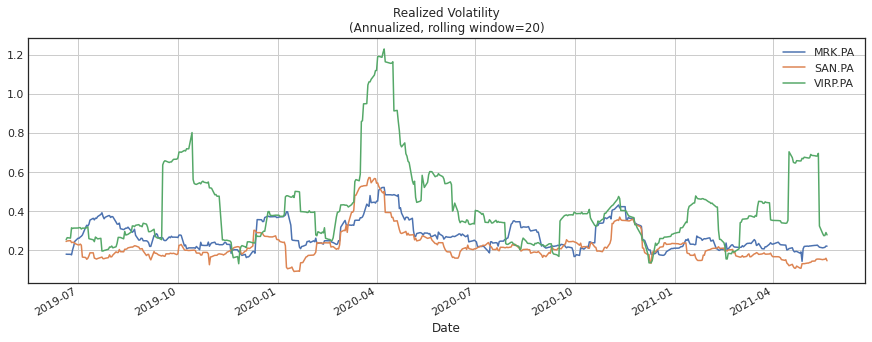

In [68]:
# Plot rolling vol comaprison
# tickers_to_plot = ["SU.PA", "EUCAR.PA", "^FCHI"]
# tickers_to_plot = ['FAUV.PA', 'FORE.PA', 'GET.PA', 'GIRO.PA']
# tickers_to_plot = df_ticker_info.loc[df_ticker_info["Industry"]=="Railroads"].index.tolist()
# tickers_to_plot = df_ticker_info.loc[df_ticker_info["Industry"]=="Biotechnology"].index.tolist()
tickers_to_plot = df_ticker_info.loc[df_ticker_info["Industry"]=="Drug Manufacturers—General"].index.tolist()
df_vols[tickers_to_plot].plot(figsize=(15,5),
#                               color=["green", "blue", "gray"],
                             )
plt.title("Realized Volatility\n(Annualized, rolling window=20)")
plt.grid()

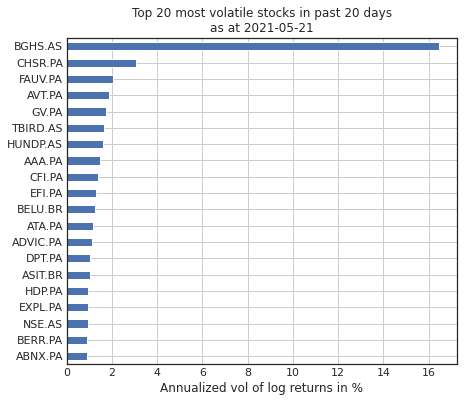

In [69]:
# Plot most volatile stocks in past 20 days
today = "2021-05-21"
top_n_vols = 20
df_vols.loc[today].sort_values(ascending=False)[:top_n_vols].sort_values().plot(kind="barh", figsize=(7,6))
plt.title(f"Top {top_n_vols} most volatile stocks in past 20 days\nas at {today}")
plt.xlabel("Annualized vol of log returns in %")
plt.grid()

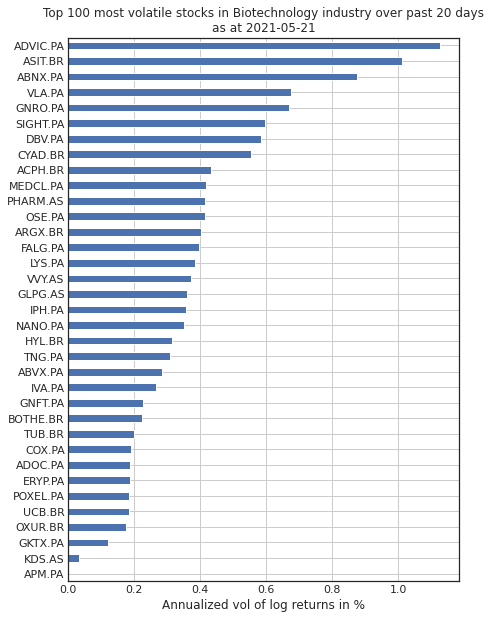

In [70]:
# Plot most volatile stocks in past 20 days
industry = "Biotechnology"
today = "2021-05-21"
top_n_vols = 100
df_vols.loc[today][df_ticker_info.loc[df_ticker_info["Industry"]==industry].index.tolist()].sort_values(ascending=False)[:top_n_vols].sort_values().plot(kind="barh", figsize=(7,10))
plt.title(f"Top {top_n_vols} most volatile stocks in {industry} industry over past 20 days\nas at {today}")
plt.xlabel("Annualized vol of log returns in %")
plt.grid()

### Correlation of moving average returns

In [71]:
start_date = '2021-01-01'
end_date = '2021-12-31'
ma_days = 20

In [72]:
# Make list of tickers to plot
tickers = ['EC.PA', 'LFDE.PA', 'MAU.PA', 'CGG.PA', 'CLB.AS', 'FTI.PA', 'FUR.AS', 'GTT.PA', 'SBMO.AS', 'SLB.PA', 'TE.PA', 'VPK.AS', 'RDSA.AS', 'RDSB.AS', 'EURN.BR', 'EXM.BR', 'FLUX.BR', 'DPAM.PA', 'ES.PA']
# tickers = df_raw_prices.columns # DON'T DO THIS FOR ~700 EURONEXT STOCKS!!!

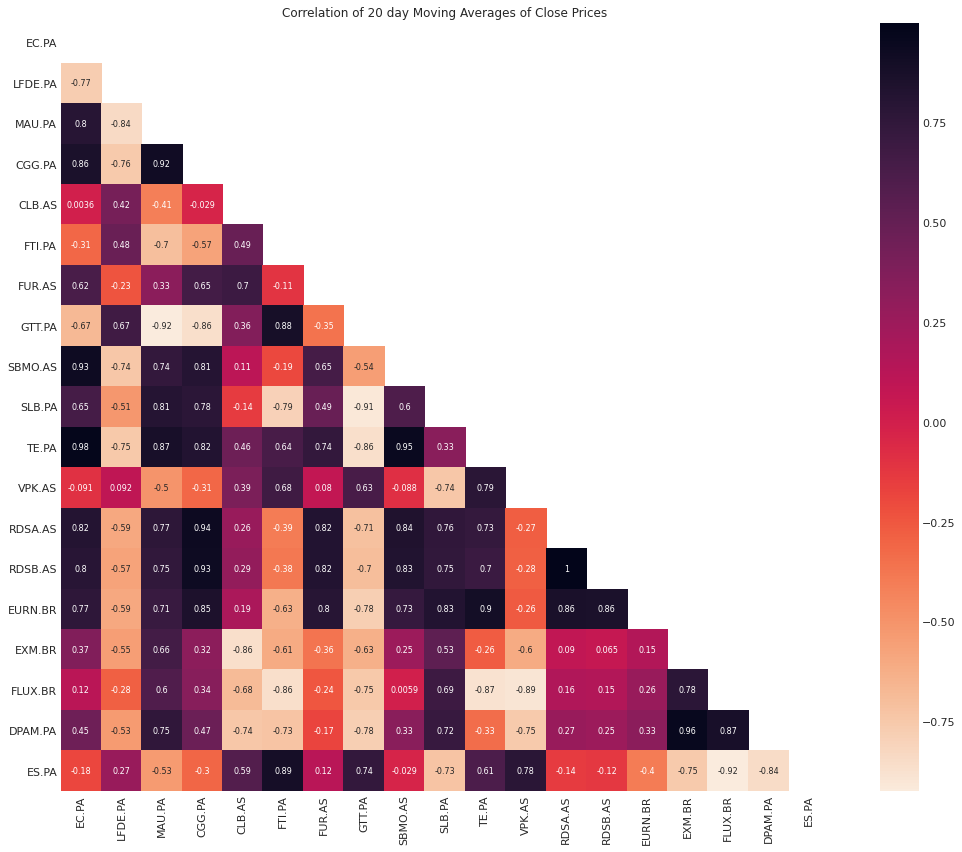

In [73]:
# Plot correlation of closing price between tickers
plot_corr_daily_returns(tickers, start_date, end_date, ma_days)

### Compare weekly patterns

In [74]:
stock_to_compare = "^FCHI"
start_date = "2021-01-01"
end_date = "2021-12-31"

In [75]:
def plot_comparison_of_weeks(stock_to_compare):

    df_compare_weeks = pd.DataFrame(df_raw_prices.loc[start_date:end_date][stock_to_compare])

    # Get day of week for each date in the index
    df_compare_weeks["weekday"] = df_compare_weeks.index.to_series().dt.day_name()
    # Get week number for each date in the index
    df_compare_weeks["weeknum"] = df_compare_weeks.index.to_series().dt.week
    df_compare_weeks = df_compare_weeks.pivot_table(index="weeknum", columns="weekday", values=stock_to_compare).transpose()
    df_compare_weeks = df_compare_weeks.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
    
    df_compare_weeks = (df_compare_weeks/df_compare_weeks.iloc[0] - 1) * 100
    
    colors = ["white" if df_compare_weeks[col].iloc[0] < df_compare_weeks[col].iloc[4] else "red" for col in df_compare_weeks.columns]
    fig, ax = plt.subplots(figsize=(15,7)) 

    df_compare_weeks.plot(ax=ax, color=colors, alpha=.6, linewidth=4)
    ax.get_legend().remove()
    ax.set_facecolor("black")
    plt.xlabel(None)
    return colors

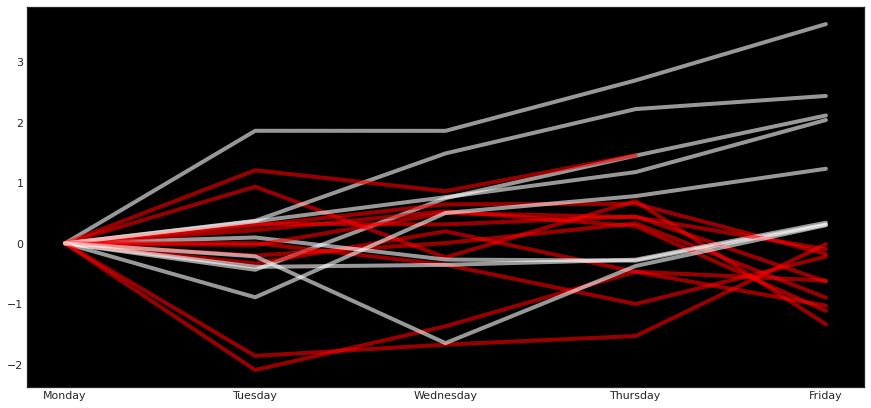

In [76]:
colors = plot_comparison_of_weeks(stock_to_compare)

In [77]:
pd.Series(colors).value_counts()

red      12
white     8
dtype: int64

## Trading Strategies

### ML-based Trading Strategy

#### Target to be predicted

1-week forward return classification. One of:

- Loss (> n% loss)
- Even (> Loss < Profit)
- Profit (> n% profit)

e.g. Price on t = 100, price on t + 1week = 103, (103/100)-1 = 3%, if n% = 2% then class="Profit"

#### Features to be implemented

- Alpha (performance relative to index), last 10 days, last 5 days
- Beta (volatility/risk relative to index), last 10 days, last 5 days
- Trailing PE --> DONE
- Forward PE --> DONE
- Current realized vol, last 10 days, last 5 days
- Price to Sales --> DONE
- Profit margin --> DONE
- Dividend payout
- Price to Free Cashflow --> DONE
- Debt to Equity --> DONE
- Current ratio --> DONE
- Moving Average crosses, 5d crossing 10d
- Correlation to index, last 10 days, last 5 days
- Index performance, last 10 days, last 5 days --> DONE
- Stock (self) performance, last 10 days, last 5 days --> DONE
- Index performance, last 10 days, last 5 days as 1 (gain) or -1 (loss)
- Stock (self) performance, last 10 days, last 5 days as 1 (gain) or -1 (loss)
- ARIMA forecast: https://pypi.org/project/pmdarima/ and https://github.com/cdignam8304/time-series/tree/master/tutorial

https://github.com/owid/covid-19-data/tree/master/public/data

NB: Data generated using "covid_data.ipynb"
- Covid new cases (smoothed + log transform) --> DONE
- Covid new vaccinations (smoothed + log transform) --> DONE

#### Parameters

In [98]:
# days_forward = 5
days_forward = 10
target_return = .05 # 5%
# target_return = .00 # 0%
test_ratio = .2

#### Create labeled dataset

In [99]:
# df_raw_prices

In [100]:
# Create dataframe of n days forward returns
df_nday_returns = -df_raw_prices.diff(-days_forward)/df_raw_prices

In [101]:
df_nday_returns.head(3)

,2CRSI.PA,2MX.PA,AAA.PA,AALB.AS,AB.PA,ABCA.PA,ABEO.PA,ABI.BR,ABIO.PA,ABN.AS,...,WKL.AS,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,ZENT.BR,^FCHI,^N100
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-23,0.015487,NaN,0.039474,0.019601,0.070358,0.014286,-0.000000,0.007463,0.139336,0.011936,...,0.022515,0.135729,0.029474,0.042017,0.001129,0.160584,0.125000,-0.018405,-0.000557,0.001512
2019-05-24,0.026608,NaN,0.039474,0.037454,0.074645,0.015798,-0.010417,0.026384,0.144638,0.000524,...,0.023665,0.142718,0.006129,0.093793,0.003366,0.153285,0.130952,-0.024390,0.008942,0.010257
2019-05-27,0.006593,NaN,0.039474,0.039539,0.097619,0.014063,-0.017668,0.018980,0.127139,-0.000260,...,0.023337,0.145631,0.043659,0.150070,-0.006704,0.204380,0.130952,-0.042424,0.008678,0.009889


In [102]:
# Create dataframe of n days forward log returns
df_nday_log_returns = -np.log(1+df_raw_prices.pct_change(-days_forward))

In [103]:
df_nday_log_returns.head(3)

,2CRSI.PA,2MX.PA,AAA.PA,AALB.AS,AB.PA,ABCA.PA,ABEO.PA,ABI.BR,ABIO.PA,ABN.AS,...,WKL.AS,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,ZENT.BR,^FCHI,^N100
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-23,0.015368,NaN,0.038715,0.019412,0.067993,0.014185,-0.000000,0.007435,0.130446,0.011866,...,0.022266,0.127274,0.029048,0.041158,0.001128,0.148923,0.117783,-0.018576,-0.000557,0.001511
2019-05-24,0.026260,NaN,0.038715,0.036770,0.071990,0.015674,-0.010471,0.026042,0.135089,0.000524,...,0.023389,0.133410,0.006110,0.089652,0.003360,0.142614,0.123060,-0.024693,0.008902,0.010205
2019-05-27,0.006572,NaN,0.038715,0.038777,0.093143,0.013965,-0.017826,0.018802,0.119683,-0.000260,...,0.023069,0.135956,0.042733,0.139823,-0.006727,0.185965,0.123060,-0.043350,0.008641,0.009840


In [104]:
# Stack the actual returns so can look at correlations
df_nday_returns_stacked = df_nday_returns.stack().reset_index()
df_nday_returns_stacked.columns = ["Date", "Ticker", "n_day_return"]
df_nday_returns_stacked.sort_values(["Ticker", "Date", ], inplace=True)

In [123]:
# df_nday_returns_stacked

In [105]:
# Stack the actual returns so can look at correlations
df_nday_log_returns_stacked = df_nday_log_returns.stack().reset_index()
df_nday_log_returns_stacked.columns = ["Date", "Ticker", "n_day_log_return"]
df_nday_log_returns_stacked.sort_values(["Ticker", "Date", ], inplace=True)

In [119]:
df_nday_log_returns_stacked

,Date,Ticker,n_day_log_return
0,2019-05-23,2CRSI.PA,0.015368
650,2019-05-24,2CRSI.PA,0.026260
1300,2019-05-27,2CRSI.PA,0.006572
1950,2019-05-28,2CRSI.PA,-0.002176
2600,2019-05-29,2CRSI.PA,0.006572
...,...,...,...
331548,2021-05-03,^N100,-0.000607
332231,2021-05-04,^N100,0.012807
332914,2021-05-05,^N100,-0.019185
333598,2021-05-06,^N100,-0.006326


In [120]:
# Convert n days forward returns to target labels

def convert_2_target(x):
    try:
#         if x >= target_return:
        if x > target_return:
            return 1
#         elif x <= -target_return:
#             return -1
        else:
            return 0
    except:
        return 0


In [125]:
# df_targets = df_nday_log_returns_stacked.applymap(convert_2_target)

df_nday_log_returns_stacked["n_day_log_return"].apply(lambda x: convert_2_target(x)).value_counts()

0    268440
1     65843
Name: n_day_log_return, dtype: int64

In [121]:
df_targets

,Date,Ticker,n_day_log_return
0,0,0,0
650,0,0,0
1300,0,0,0
1950,0,0,0
2600,0,0,0
...,...,...,...
331548,0,0,0
332231,0,0,0
332914,0,0,0
333598,0,0,0


In [109]:
df_targets.shape

(334283, 3)

In [110]:
# df_targets.stack().unstack() # this is how you get back to original frame

df_targets_stacked = df_targets.stack().reset_index()
df_targets_stacked.columns = ["Date", "Ticker", "Target"]
df_targets_stacked.sort_values(["Ticker", "Date", ], inplace=True)

In [112]:
df_targets_stacked

,Date,Ticker,Target
0,0,Date,0
1824,1,Date,0
3336,2,Date,0
4848,3,Date,0
6360,4,Date,0
...,...,...,...
996800,334278,n_day_log_return,1
998312,334279,n_day_log_return,0
999824,334280,n_day_log_return,0
1001336,334281,n_day_log_return,0


In [111]:
# Add column with previous yr end date so can be used to link to features from financial statements

def get_prev_yr_end(x):
    yr = x.year-1
    datestring = f"{yr}-12-31"
    return pd.to_datetime(datestring)

df_targets_stacked["Prev_Yr_End"] = df_targets_stacked["Date"].apply(lambda x: get_prev_yr_end(x))

# Put columns in better order so Target is last column
cols = ['Date', 'Prev_Yr_End', 'Ticker', 'Target']
df_targets_stacked = df_targets_stacked[cols]

AttributeError: 'int' object has no attribute 'year'

In [ ]:
df_targets_stacked

#### Features

##### Trailing PE

In [ ]:
df_trailing_pe_stacked = df_trailing_pe_data.stack().reset_index()
df_trailing_pe_stacked.columns = ["Date", "Ticker", "Trailing_PE"]
df_trailing_pe_stacked.sort_values(["Ticker", "Date", ], inplace=True)

In [ ]:
df_trailing_pe_stacked

##### Forward PE

In [ ]:
df_forward_pe_stacked = df_forward_pe_data.stack().reset_index()
df_forward_pe_stacked.columns = ["Date", "Ticker", "Forward_PE"]
df_forward_pe_stacked.sort_values(["Ticker", "Date", ], inplace=True)

In [ ]:
df_forward_pe_stacked

##### Price 2 Sales

In [ ]:
df_p2s_stacked = df_p2s_data.stack().reset_index()
df_p2s_stacked.columns = ["Date", "Ticker", "P2S"]
df_p2s_stacked.sort_values(["Ticker", "Date", ], inplace=True)

In [ ]:
df_p2s_stacked

##### Profit Margins

In [ ]:
df_pm_stacked = df_pm_data.stack().reset_index()
df_pm_stacked.columns = ["Date", "Ticker", "ProfitMargin"]
df_pm_stacked.sort_values(["Ticker", "Date", ], inplace=True)

In [ ]:
df_pm_stacked

##### Dividend Payout ratios

In [ ]:
# COME BACK TO THIS LATER!

##### Price to Free Cashflow

In [ ]:
df_pfcf_stacked = df_pfcf_data.stack().reset_index()
df_pfcf_stacked.columns = ["Date", "Ticker", "P2FCF"]
df_pfcf_stacked.sort_values(["Ticker", "Date", ], inplace=True)

In [ ]:
df_pfcf_stacked

##### Debt Equity ratios

In [ ]:
df_de_stacked = df_de_data.stack().reset_index()
df_de_stacked.columns = ["Date", "Ticker", "DebtEquity"]
df_de_stacked.sort_values(["Ticker", "Date", ], inplace=True)

In [ ]:
df_de_stacked

##### Current ratios

In [ ]:
df_cr_stacked = df_cr_data.stack().reset_index()
df_cr_stacked.columns = ["Date", "Ticker", "CurrRatio"]
df_cr_stacked.sort_values(["Ticker", "Date", ], inplace=True)

In [ ]:
df_cr_stacked

##### Covid new cases

In [ ]:
df_covid_cases_stacked = df_log_new_cases.reset_index()
df_covid_cases_stacked.columns = ["Date", "log_new_cases"]

In [ ]:
df_covid_cases_stacked

##### Covid new vaccinations

In [ ]:
df_covid_vaccinations_stacked = df_log_new_vaccinations.reset_index()
df_covid_vaccinations_stacked.columns = ["Date", "log_new_vaccinations"]

In [ ]:
df_covid_vaccinations_stacked

##### Index performance

In [ ]:
# Use this to create binary features
def gain_or_loss(x):
    if x > 0:
        return 1
    return -1

In [ ]:
periods = 5
index_chg_5 = (df_raw_prices["^N100"].diff(periods=periods)/df_raw_prices["^N100"].shift(periods=periods))
index_chg_5 = index_chg_5.reset_index()
index_chg_5.columns = ["Date", "euronext_5d_chg"]
index_chg_5.fillna(value=0, inplace=True)

periods = 10
index_chg_10 = (df_raw_prices["^N100"].diff(periods=periods)/df_raw_prices["^N100"].shift(periods=periods))
index_chg_10 = index_chg_10.reset_index()
index_chg_10.columns = ["Date", "euronext_10d_chg"]
index_chg_10.fillna(value=0, inplace=True)

In [ ]:
index_chg_5_binary = index_chg_5[["Date"]]
index_chg_5_binary["euronext_5d_chg_binary"] = index_chg_5["euronext_5d_chg"].apply(lambda x: gain_or_loss(x))

In [ ]:
index_chg_10_binary = index_chg_10[["Date"]]
index_chg_10_binary["euronext_10d_chg_binary"] = index_chg_10["euronext_10d_chg"].apply(lambda x: gain_or_loss(x))

##### Stock (self) performance 

In [ ]:
periods = 5
stock_chg_5 = (df_raw_prices.diff(periods=periods)/df_raw_prices.shift(periods=periods)).stack().reset_index()
stock_chg_5.columns = ["Date", "Ticker", "stock_chg_5"]
stock_chg_5.sort_values(["Ticker", "Date", ], inplace=True)

periods = 10
stock_chg_10 = (df_raw_prices.diff(periods=periods)/df_raw_prices.shift(periods=periods)).stack().reset_index()
stock_chg_10.columns = ["Date", "Ticker", "stock_chg_10"]
stock_chg_10.sort_values(["Ticker", "Date", ], inplace=True)

In [ ]:
stock_chg_5.head()

In [ ]:
stock_chg_10.head()

In [ ]:
stock_chg_5_binary = stock_chg_5[["Date", "Ticker"]]
stock_chg_5_binary["stock_chg_5_binary"] = stock_chg_5["stock_chg_5"].apply(lambda x: gain_or_loss(x))

In [ ]:
stock_chg_10_binary = stock_chg_10[["Date", "Ticker"]]
stock_chg_10_binary["stock_chg_10_binary"] = stock_chg_10["stock_chg_10"].apply(lambda x: gain_or_loss(x))

#### Regression models: SVR and RandomForestRegressor

In [ ]:
df_raw_prices["MC.PA"].plot()

In [ ]:
to_predict_svr = df_raw_prices.loc["2020-04-01":"2021-12-31"][["MC.PA"]].rolling(window=10, center=False).mean()
to_predict_svr.reset_index(inplace=True)

In [ ]:
to_predict_svr["MC.PA"].plot()

In [ ]:
# define function for create N lags
def create_lags(df, N):
    for i in range(N):
        df['Lag' + str(i+1)] = df["MC.PA"].shift(i+1)
    return df

# create 10 lags
num_lags = 100
to_predict_svr = create_lags(to_predict_svr, num_lags)

In [ ]:
to_predict_svr.dropna(inplace=True)

In [ ]:
to_predict_svr.head()

In [ ]:
to_predict_svr["MC.PA"].plot()
plt.grid()

In [ ]:
y = to_predict_svr["MC.PA"].values
X = to_predict_svr.iloc[:, 2:].values

In [ ]:
y.shape

In [ ]:
train_idx = int(len(to_predict_svr)*.9)
train_idx

In [ ]:
X_train, y_train, X_test, y_test = X[:train_idx], y[:train_idx], X[train_idx:], y[train_idx:]

In [ ]:
# fit and predict

# clf = SVR(
#     C=1,
# )

clf = RandomForestRegressor(n_estimators=500)

clf.fit(X_train, y_train)

In [ ]:
preds_test = clf.predict(X_test)

In [ ]:
plt.plot(y_train)

In [ ]:
plt.plot(y_test)

In [ ]:
plt.plot(preds_test)

#### ARIMA

In [ ]:
# ?pm.auto_arima

In [ ]:
model = pm.auto_arima(
    y_train,
    seasonal=False,
)

In [ ]:
# make your forecasts
forecasts = model.predict(y_test.shape[0])  # predict N steps into the future

In [ ]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:train_idx], y_train, c='blue')
plt.plot(x[train_idx:], forecasts, c='green')
plt.show()

In [ ]:
sns.jointplot(
        x=y_test,
        y=forecasts,
        kind="resid",
#         color="#4CB391",
    )

#### Combine features with target

In [ ]:
# Merge each feature into single dataframe, along with target labels...
# NB: features from financial statements and static ratios require special treatment due to year end dates

# Trailing PE
model_data = pd.merge(
     left=df_trailing_pe_stacked,
     right=df_targets_stacked,
#      how="inner",
     how="right",
     left_on=["Date", "Ticker"],
     right_on=["Date", "Ticker"],
     sort=False,
     validate="one_to_one",
 )

# Forward PE
model_data = pd.merge(
     left= df_forward_pe_stacked,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date", "Ticker"],
     right_on=["Date", "Ticker"],
     sort=False,
     validate="one_to_one",
 )

# Price 2 Sales
model_data = pd.merge(
     left= df_p2s_stacked,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date", "Ticker"],
     right_on=["Date", "Ticker"],
     sort=False,
     validate="one_to_one",
 )

# Profit Margins
model_data = pd.merge(
     left= df_pm_stacked,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date", "Ticker"],
     right_on=["Prev_Yr_End", "Ticker"],
     sort=False,
#      validate="one_to_one",
 )
model_data.drop(["Date_x"], axis=1, inplace=True) # remove superfluous column
model_data.rename(columns={'Date_y':'Date'}, inplace=True) # fix column name

# Dividend Payout ratios - CPME BACK TO THIS LATER!

# Price 2 Free Cashflow
model_data = pd.merge(
     left= df_pfcf_stacked,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date", "Ticker"],
     right_on=["Date", "Ticker"],
     sort=False,
     validate="one_to_one",
 )

# Debt Equity ratios
model_data = pd.merge(
     left= df_de_stacked,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date", "Ticker"],
     right_on=["Prev_Yr_End", "Ticker"],
     sort=False,
#      validate="one_to_one",
 )
model_data.drop(["Date_x"], axis=1, inplace=True) # remove superfluous column
model_data.rename(columns={'Date_y':'Date'}, inplace=True) # fix column name

# Current ratios
model_data = pd.merge(
     left= df_cr_stacked,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date", "Ticker"],
     right_on=["Prev_Yr_End", "Ticker"],
     sort=False,
#      validate="one_to_one",
 )
model_data.drop(["Date_x"], axis=1, inplace=True) # remove superfluous column
model_data.rename(columns={'Date_y':'Date'}, inplace=True) # fix column name

# Covid new cases
model_data = pd.merge(
     left= df_covid_cases_stacked,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date"],
     right_on=["Date"],
     sort=False,
#      validate="one_to_one",
 )

# Covid new vaccinations
model_data = pd.merge(
     left= df_covid_vaccinations_stacked,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date"],
     right_on=["Date"],
     sort=False,
#      validate="one_to_one",
 )

# 5-day change in euronext index
model_data = pd.merge(
     left= index_chg_5,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date"],
     right_on=["Date"],
     sort=False,
#      validate="one_to_one",
 )

# 10-day change in euronext index
model_data = pd.merge(
     left= index_chg_10,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date"],
     right_on=["Date"],
     sort=False,
#      validate="one_to_one",
 )

# 5-day change in index as binary
model_data = pd.merge(
     left= index_chg_5_binary,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date"],
     right_on=["Date"],
     sort=False,
#      validate="one_to_one",
 )

# 10-day change in index as binary
model_data = pd.merge(
     left= index_chg_10_binary,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date"],
     right_on=["Date"],
     sort=False,
#      validate="one_to_one",
 )

# 5-day change in stock price
model_data = pd.merge(
     left= stock_chg_5,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date", "Ticker"],
     right_on=["Date", "Ticker"],
     sort=False,
     validate="one_to_one",
 )

# 10-day change in stock price
model_data = pd.merge(
     left= stock_chg_10,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date", "Ticker"],
     right_on=["Date", "Ticker"],
     sort=False,
     validate="one_to_one",
 )

# 5-day change in stock price as binary
model_data = pd.merge(
     left= stock_chg_5_binary,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date", "Ticker"],
     right_on=["Date", "Ticker"],
     sort=False,
     validate="one_to_one",
 )

# 10-day change in stock price as binary
model_data = pd.merge(
     left= stock_chg_10_binary,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date", "Ticker"],
     right_on=["Date", "Ticker"],
     sort=False,
     validate="one_to_one",
 )

# df_nday_returns (this is value used to create target labels)
model_data = pd.merge(
     left= df_nday_returns_stacked,
     right = model_data,
#      how="inner",
     how="right",
     left_on=["Date", "Ticker"],
     right_on=["Date", "Ticker"],
     sort=False,
     validate="one_to_one",
 )

In [ ]:
model_data.shape

# (362884, 11) before adding Covid data

In [ ]:
model_data.sample(10)

In [ ]:
model_data.describe(include="all")

#### Target class counts

In [ ]:
# Plot target value counts
model_data["Target"].value_counts().sort_values(ascending=True).plot.barh(figsize=(8, 2))
plt.grid()
plt.title("Target counts in full dataset")
plt.tight_layout()

#### Correlation of features with target

In [ ]:
model_data.columns

In [ ]:
# Plot correlation matrix

# Calc correlations
corr = model_data[[
    'stock_chg_10_binary',
    'stock_chg_5_binary',
    'euronext_10d_chg_binary',
    'euronext_5d_chg_binary',
    'n_day_return',
    'Target',
]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Pearson Correlation between Features")
plt.tight_layout()

In [ ]:
# Is past performance and indicator of the future?

# kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }

ticker = "MC.PA"
start_date = "2019-01-01"
end_date = "2021-12-31"
plot_data = model_data.loc[(model_data["Date"] > start_date) & (model_data["Date"] < end_date)]

historical_data = [
    "stock_chg_5",
    "stock_chg_10",
    "euronext_5d_chg",
    "euronext_10d_chg",
    "Trailing_PE",
    "Forward_PE",
    "log_new_cases",
]

for hd in historical_data:
    n = historical_data.index(hd)
    y = plot_data.loc[model_data["Ticker"]==ticker]["n_day_return"]
    x = plot_data.loc[model_data["Ticker"]==ticker][hd]
#     ax.scatter(x, y, alpha=.5)
    sns.jointplot(
        x=x,
        y=y,
        kind="hex",
#         color="#4CB391",
    )
#     plt.ylim(-.3, .3); plt.xlim(-.3, .3)
    

plt.tight_layout()

#### Data quality issues

In [ ]:
# model_data.loc[model_data["Forward_PE"]==np.inf] # These need to be fixed!

In [ ]:
# model_data.loc[model_data["P2S"]==np.inf] # These need to be fixed!

In [ ]:
# model_data["P2FCF"].hist(bins=100, log=True) # Need to deal with outliers?

In [ ]:
# model_data["CurrRatio"].hist(bins=100, log=True) # Need to deal with outliers?

#### Create modeling dataset

In [ ]:
columns_to_drop = [
    "Ticker",
    "Date",
    "Prev_Yr_End",
    "Target",
]
df_featureset = model_data.drop(columns_to_drop, axis=1)

In [ ]:
df_featureset.shape

In [ ]:
# Replace np.nan and np.inf with 0s (not sure this is best treatment!)
df_featureset.replace(to_replace=np.nan, value=0, inplace=True)
df_featureset.replace(to_replace=np.inf, value=0, inplace=True)
df_featureset.replace(to_replace=-np.inf, value=0, inplace=True)

In [ ]:
df_featureset.describe()

In [ ]:
df_featureset.sample(5)

#### Train / Test split

In [ ]:
traintest_cutoff = math.floor(len(df_featureset.index)*(1-test_ratio))
traintest_cutoff

In [ ]:
df_train_features = df_featureset.iloc[:traintest_cutoff]
features_train = df_train_features.values
df_test_features = df_featureset.iloc[traintest_cutoff:]
features_test = df_test_features.values
target_train = model_data["Target"].iloc[:traintest_cutoff]
target_test = model_data["Target"].iloc[traintest_cutoff:]

In [ ]:
target_train.value_counts(normalize=True)

In [ ]:
target_test.value_counts(normalize=True)

#### Build classifier

In [ ]:
# ?RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(
    n_estimators=100,
#     class_weight="balanced", # slightly worse performance when balanced
)

# clf = SVC()

# clf = LogisticRegression(class_weight="balanced")

In [ ]:
clf.fit(features_train, target_train)

In [ ]:
clf.score(features_train, target_train)

#### Evaluate against test set

In [ ]:
predictions_test = clf.predict(features_test)

In [ ]:
pd.Series(predictions_test).value_counts()

In [ ]:
print(confusion_matrix(target_test, predictions_test, normalize="all"))

In [ ]:
print(classification_report(target_test, predictions_test))

#### Previous results


-----------------------------------------------------

precision    recall  f1-score   support

          -1       0.14      0.06      0.08      6925
           0       0.80      0.84      0.82     56760
           1       0.16      0.18      0.17      8892

    accuracy                           0.69     72577
   macro avg       0.37      0.36      0.36     72577
weighted avg       0.66      0.69      0.67     72577

-----------------------------------------------------
(without Covid features)


-----------------------------------------------------

precision    recall  f1-score   support

          -1       0.16      0.12      0.14      5283
           0       0.83      0.91      0.87     58911
           1       0.19      0.11      0.14      8383

    accuracy                           0.76     72577
   macro avg       0.40      0.38      0.38     72577
weighted avg       0.71      0.76      0.73     72577

-----------------------------------------------------
(with Covid features)

### Moving Average Strategy

In [ ]:
# Create trade recommendations

# Create moving averages
rolling_20 = np.round(df_raw_prices.rolling(window=20, center=False).mean(), 2)
rolling_50 = np.round(df_raw_prices.rolling(window=50, center=False).mean(), 2)

# Creates df where if M.A.20 < M.A.50 then True else False
rolling_diff = pd.DataFrame(np.where(rolling_20<rolling_50, True, False), columns=df_raw_prices.columns, index=df_raw_prices.index)

# Apply following to rolling_diff dataframe:

# If yesterday == True and today == False
# Then "Sell"
# Elif yesterday == False and today == True
# Then "Buy"
# Else None
sell_opps = rolling_diff < rolling_diff.shift(periods=-1)
buy_opps = rolling_diff > rolling_diff.shift(periods=-1)

# Replace boolean values with "Buy"/"Sell" strings, then merge into single dataframe
sell_opps.replace(to_replace=True, value="Sell", inplace=True)
sell_opps.replace(to_replace=False, value=np.nan, inplace=True)
buy_opps.replace(to_replace=True, value="Buy", inplace=True)
buy_opps.replace(to_replace=False, value=np.nan, inplace=True)
all_opps = sell_opps.mask(buy_opps=="Buy", buy_opps) # Merge buy_opps with sell_opps

In [ ]:
# Get all historic recommendations for a given ticker
# ticker = "SU.PA"
# all_opps[ticker][~all_opps[ticker].isnull()]

In [ ]:
# Get historic price on particular date for particular ticker
# df_raw_prices[ticker]["2020-03-11"]

In [ ]:
# Total counts
# buy_opps
# sell_opps
# print(f"There are {all_opps[all_opps=='Sell'].count().sum()} sell opportunities.")
# print(f"There are {all_opps[all_opps=='Buy'].count().sum()} buy opportunities.")
# all_opps.count().sum() # Counts values that are neither NA or np.nan

# all_opps[all_opps=='Sell'].loc["2021-04-26"].count().sum()
# all_opps[all_opps=='Buy'].loc["2021-04-26"].count().sum()

In [ ]:
opportunity_date = "2021-05-21"

In [ ]:
# Generate Buy and Sell recommendations
recommend_buy = list(all_opps.loc[opportunity_date][all_opps.loc[opportunity_date]=="Buy"].index)
recommend_sell = list(all_opps.loc[opportunity_date][all_opps.loc[opportunity_date]=="Sell"].index)

In [ ]:
# Function to plot recommendations
def plot_recommendation(ticker, start_date, end_date, ax):
    
    base = df_raw_prices.loc[start_date:end_date][ticker]
    rolling_20 = np.round(base.rolling(window=20, center=False).mean(), 2)
    rolling_50 = np.round(base.rolling(window=50, center=False).mean(), 2)
    rolling_200 = np.round(base.rolling(window=200, center=False).mean(), 2)

    ax = ax
    ax.plot(base, label="Close", linewidth=4, alpha=.2)
    ax.plot(rolling_20, label="20d M.A.", linestyle="dashed", linewidth=2)
    ax.plot(rolling_50, label="50d M.A.", linestyle="dashed", linewidth=2)
    ax.plot(rolling_200, label="200d M.A.", linestyle="dashed", linewidth=2)
    ax.set_ylabel("Close Price")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.set_title(f"{ticker}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

In [ ]:
# Plot Buy recommendations
if math.ceil(len(recommend_buy)/3) == 1:
    height = (math.ceil(len(recommend_buy))/3*4)+3
else:
    height = (math.ceil(len(recommend_buy))/3*4)

fig = plt.figure(figsize=(15, height))
for buy in recommend_buy:
    n = recommend_buy.index(buy)+1
#     print(n)
    ax = fig.add_subplot(math.ceil(len(recommend_buy)/3), 3, n)
    plot_recommendation(buy, "2021-01-01", opportunity_date, ax=ax)
plt.suptitle(f"BUY RECOMMENDATIONS {opportunity_date}\n")
plt.tight_layout()

In [ ]:
# Plot Sell recommendations
if math.ceil(len(recommend_sell)/3) == 1:
    height = (math.ceil(len(recommend_sell))/3*4)+3
else:
    height = (math.ceil(len(recommend_sell))/3*4)

fig = plt.figure(figsize=(15,height))
for sell in recommend_sell:
    n = recommend_sell.index(sell)+1
#     print(n)
    ax = fig.add_subplot(math.ceil(len(recommend_sell)/3), 3, n)
    plot_recommendation(sell, "2021-01-01", opportunity_date, ax=ax)
plt.suptitle(f"SELL RECOMMENDATIONS {opportunity_date}\n")
plt.tight_layout()

### Back-test Moving Average Strategy

In [ ]:
# Function to run Back-testing

def run_backtest(start_date, end_date):

    # Generate Buy trades
    index = all_opps.index
    buy_trades = {}
    for ticker in all_opps.columns:
        condition = all_opps[ticker] == "Buy"
        buy_indices = index[condition]
        buy_indices_list = buy_indices.tolist()
        buy_ind_dates = [str(ts.year) + "-" + str(ts.month) + "-" + str(ts.day) for ts in buy_indices_list]
        df_raw_prices.loc[buy_ind_dates][ticker]
        buy_prices = list(df_raw_prices.loc[buy_ind_dates][ticker].values)
        buy_trades[ticker] = list(zip(buy_ind_dates, buy_prices))

    # Generate Sell trades
    index = all_opps.index
    sell_trades = {}
    for ticker in all_opps.columns:
        condition = all_opps[ticker] == "Sell"
        sell_indices = index[condition]
        sell_indices_list = sell_indices.tolist()
        sell_ind_dates = [str(ts.year) + "-" + str(ts.month) + "-" + str(ts.day) for ts in sell_indices_list]
        df_raw_prices.loc[sell_ind_dates][ticker]
        sell_prices = list(df_raw_prices.loc[sell_ind_dates][ticker].values)
        sell_trades[ticker] = list(zip(sell_ind_dates, sell_prices))

    # Apply strategy and calculate p&l per ticker:

    profits_losses = []

    for ticker in df_raw_prices.columns.to_list()[:-2]: # -2 to exclude the indices CAC40 and Euronext
    # for ticker in df_raw_prices.columns.to_list()[650:655]: # for testing use the first (tickers)
    #     print("=" * 72)
    #     print(ticker)
        buy_dates = [datetime.strptime(trade[0], "%Y-%m-%d").date() for trade in buy_trades[ticker]]
        sell_dates = [datetime.strptime(trade[0], "%Y-%m-%d").date() for trade in sell_trades[ticker]]
        all_dates = buy_dates + sell_dates
        
#         print(type(all_dates[0]))
        
        direction = [-1 for date in buy_dates] + [1 for date in sell_dates]
        buy_close = [trade[1] for trade in buy_trades[ticker]]
        sell_close = [trade[1] for trade in sell_trades[ticker]]
        all_close = buy_close + sell_close
        df_executions = pd.DataFrame({
            "Direction": direction,
            "Close": all_close,
        }, index=all_dates)
        df_executions.sort_index(inplace=True)
        df_executions["Cashflow"] = df_executions["Direction"] * df_executions["Close"]
        
        # Keep executions only within the prescribed date range we are running the backtest for:
        s = pd.to_datetime(start_date).date()
        e = pd.to_datetime(end_date).date()
        df_executions = df_executions[s:e]
        
    #     try:
    #         print("First", df_executions.iloc[0]["Direction"])
    #     except:
    #         pass
    #     try:
    #         print("Last,", df_executions.iloc[len(df_executions)-1]["Direction"])
    #     except:
    #         pass

        # Execution Rules
        # ---------------
        # Always start with a Buy and always end with a Sell. Avoid short selling and unrealised p&l.

        try:
            # Drop first row if its a Sell
            if df_executions.iloc[0]["Direction"] == 1:
                df_executions.drop(df_executions.index[0], inplace=True, axis=0)
        except:
            pass

        try:
            # Drop last row if its a Buy
            if df_executions.iloc[len(df_executions)-1]["Direction"] == -1:
                df_executions.drop(df_executions.index[len(df_executions)-1], inplace=True, axis=0)
        except:
            pass

    #     print(df_executions)
        ticker_pnl = df_executions["Cashflow"].sum()
        profits_losses.append(ticker_pnl)
    
    df_Backtest_Results = pd.DataFrame({
        "Back-test PnL":profits_losses,
    }, index=df_raw_prices.columns[:-2])
    
    return df_Backtest_Results, df_executions
    

In [ ]:
# Generate backtest results
# start_date = "2019-01-01"
# end_date = "2021-12-31"

# df_Backtest_Results, df_executions = run_backtest(start_date, end_date)

In [ ]:
# df_executions

In [ ]:
# df_Backtest_Results.sort_values(by="Back-test PnL", ascending=False)

In [ ]:
# df_Backtest_Results.describe()

In [ ]:
# df_Backtest_Results.sum()

In [ ]:
# df_Backtest_Results.hist(bins=100, log=True, figsize=(10, 6), alpha=.5)

In [ ]:
# df_Backtest_Results.loc["VLTSA.PA"]

## Test widgets

#### Test 1: single widgets

In [ ]:
# def print_value(myvalue):
#     print(f"The current value is: {myvalue}")

In [ ]:
# widgets.interact(print_value, myvalue=[1, 2, 3, 4, 5]) # use list to create dropdown

In [ ]:
# widgets.interact(print_value, myvalue=(0, 10, 1)) # use tuple to create number slider

In [ ]:
# widgets.interact(print_value, myvalue=(0, 10, .5)) # for decimal values

In [ ]:
# widgets.interact(print_value, myvalue=True) # for boolean

In [ ]:
# Multiselect dropdown. Use shift or ctrl to select multiple values
# w = widgets.SelectMultiple(
#     options=['Apples', 'Oranges', 'Pears'],
#     value=['Oranges'],
#     #rows=10,
#     description='Fruits',
#     disabled=False
# )
# w

In [ ]:
# print(w.value)

#### Test 2: multiple widgets

In [ ]:
# def three_variables(x, y, z):
#     return (x, y, z)

In [ ]:
# _ = widgets.interact(
#     three_variables,
#     x=["Blue", "Green", "Black"],
#     y=(1, 5, 1),
#     z=True,
# )

#### Fixed variables

In [ ]:
# _ = widgets.interact(
#     three_variables,
#     x=["Blue", "Green", "Black"],
#     y=(1, 5, 1),
#     z=widgets.fixed("I am fixed"),
# )

   #### Create widgets with decorators

In [ ]:
# @widgets.interact(x=(0, 10, 1), y=["a", "b", "c"])
# def print_slider_val(x, y):
#     print(f"Slider says: {x}. Dropdown says: {y}")

#### Create one of my charts

In [ ]:
# ticker_list = list(df_raw_prices.columns)
# ticker_list.sort()
# @widgets.interact(
#     ticker=ticker_list,
#     start_date=widgets.Text(value="2020-01-01", description="start date", continuous_update=False),
#     end_date=widgets.Text(value="2020-12-31", description="end date", continuous_update=False),
# )
# def plot_ticker(ticker, start_date, end_date):
#     df_raw_prices.loc[start_date:end_date][ticker].plot()
#     plt.title(ticker)